In [4]:
# 1. Import libraries
import pandas as pd
import os

# 2. Check current working directory (optional)
print(os.getcwd())

# 3. Load the CSV using correct path (.. means go up one folder)
df = pd.read_csv("../diabetes.csv")

# 4. Check data
df.head()

# 5. Proceed to split data
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


C:\Users\manum\diabetes prediction\model optimisation


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 42)

In [12]:
#define the grid parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
     'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
    

In [13]:
#RUn GridsearchCV
grid = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        99
           1       0.63      0.80      0.70        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.76      0.76       154

ROC AUC Score: 0.7686868686868686


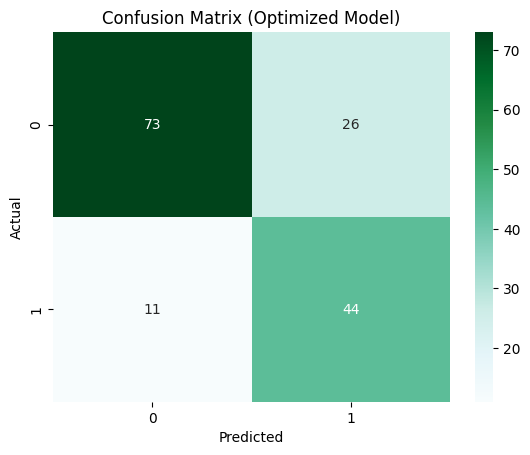

In [15]:
#Evaluate the best Model

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="BuGn")
plt.title("Confusion Matrix (Optimized Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


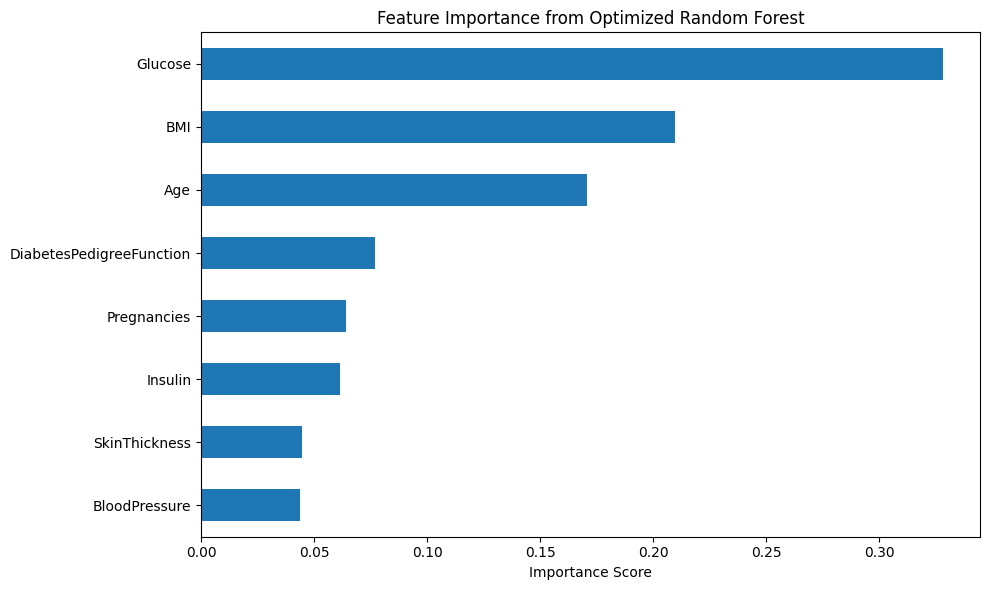

In [16]:
#Plot Feature Importance

import pandas as pd

importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance from Optimized Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
